In [79]:
import statsmodels
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns # For plotting
import pandas as pd
import zipfile
import numpy as np

seed(1)

In [19]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))
df

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,Pluvial,Permanent,199,Siliceous,0.001,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,Groundwater,Permanent,1253,Calcareous,13.406,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,Groundwater,Permanent,1155,Calcareous,9.398,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,Groundwater,Permanent,1074,Calcareous,8.186,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,Groundwater,Permanent,1018,Calcareous,11.736,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,Pluvial,Permanent,80,Siliceous,17.700,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,Pluvial,Permanent,150,Siliceous,0.010,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,Pluvial,Permanent,140,Siliceous,3.059,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,Pluvial,Permanent,450,Siliceous,62.100,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes

Site_code                                object
Latitude                                float64
Longitude                               float64
Country                                  object
Catchment_name                           object
Water_source_type                        object
Flow_regime                              object
Altitude                                  int64
Geological_typology                      object
Actual_river_slope                      float64
Natural_sediment                        float64
Elevation_mean_catch                    float64
prec_ann_catch                          float64
temp_ann                                float64
temp_jan                                float64
temp_jul                                float64
Barriers_catchment_down                   int64
Barriers_river_segment_up               float64
Barriers_river_segment_down             float64
Barriers_number_river_segment_up        float64
Barriers_number_river_segment_down      

In [30]:
df['Salmo trutta fario']

0       0
1       1
2       1
3       1
4       1
       ..
5006    1
5007    1
5008    1
5009    1
5010    1
Name: Salmo trutta fario, Length: 5011, dtype: int64

In [92]:
# 1. Using an appropriate visualization, check the effect of Mean Annual Temperature (Temp_ann) on the
# presence of Salmo trutta fario (Brown Trout)

trout = pd.crosstab(df['temp_ann'], df['Salmo trutta fario'])
trout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 3.9 to 18.3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       130 non-null    int64
 1   1       130 non-null    int64
dtypes: int64(2)
memory usage: 3.0 KB


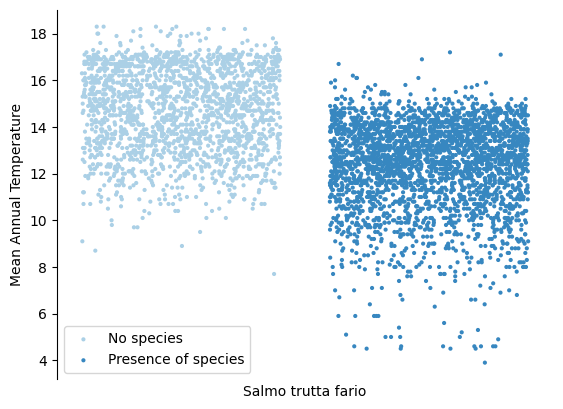

In [74]:
sns.stripplot(
    data= df,
    x='Salmo trutta fario',
    y='temp_ann',
    size = 3,
    jitter = 0.4,
    hue = 'Salmo trutta fario',
    palette = 'Blues'
    )
plt.tick_params(bottom=False) # removes bottom tickmarks
sns.despine(bottom=True)
plt.ylabel('Mean Annual Temperature')
plt.xlabel('Salmo trutta fario')
plt.legend(['No species', 'Presence of species'])
plt.xticks([]) # Remove x-axis labels
plt.show()

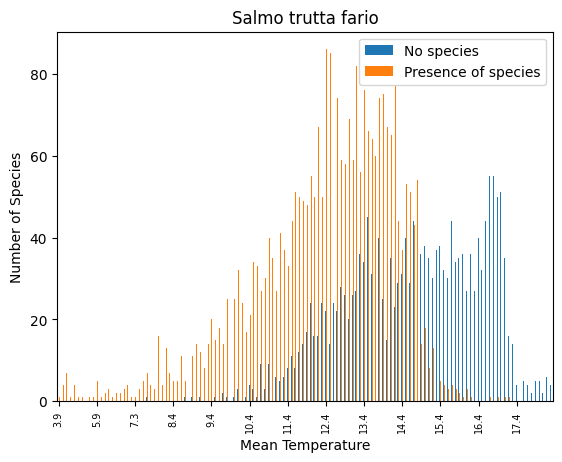

In [109]:
barplot = trout.plot.bar()
plt.xlabel('Mean Temperature')
plt.xticks(np.arange(0, 129, step = 10), size = 7)
plt.ylabel('Number of Species')
plt.title('Salmo trutta fario')
plt.legend(['No species', 'Presence of species'])

In [113]:
# 2. Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a
# normal distribution

data = df['Actual_river_slope']
data

0        0.001
1       13.406
2        9.398
3        8.186
4       11.736
         ...  
5006    17.700
5007     0.010
5008     3.059
5009    62.100
5010    17.800
Name: Actual_river_slope, Length: 5011, dtype: float64

In [54]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df['Actual_river_slope'])
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=nan, p=1.000
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [55]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df['Actual_river_slope'])
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=nan, p=nan
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


In [56]:
from scipy.stats import kstest

# K-S test
stat, p = kstest(df['Actual_river_slope'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=nan, p=nan
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


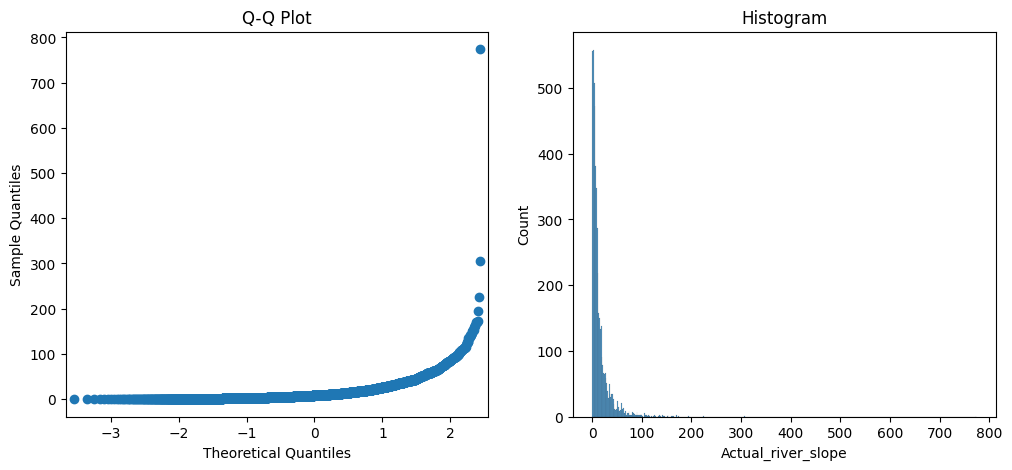

In [114]:
# Check normality using plots 
# q-q plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Q-Q plot
qqplot(data, line='s', ax=ax1)
ax1.set_title('Q-Q Plot')

# Plot histogram
sns.histplot(data, ax=ax2)
ax2.set_title('Histogram')

plt.show()

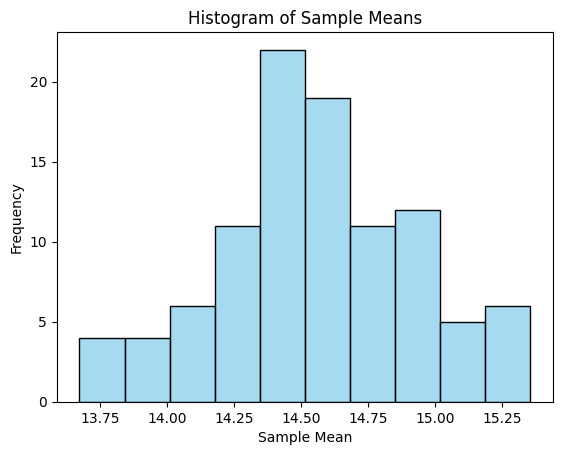

In [126]:
# 3. Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot
# the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution

means = []
data_nan = data[~np.isnan(data)]

for _ in range(100):
    sample = np.random.choice(data_nan, size=5000, replace=True)
    sample_mean = np.mean(sample)
    means.append(sample_mean)


sns.histplot(means,color='skyblue', edgecolor='black')
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [129]:
# normality test
stat, p = shapiro(means)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.987, p=0.427
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)
